In [1]:
# ANN
# DNN
# CNN
# RNN
# AE
# GAN
# 데이터 증강 
# 강화학습
# 양자학습

ANN
  - 입력계층 - 은닉계층 - 출력계층

In [3]:
from keras import layers, models

In [4]:
# 분산방식
def Ann_models_func(nin,nh,nout):
  x = layers.Input(shape = (nin,))
  h = layers.Activation('relu')(layers.Dense(nh)(x))
  y = layers.Activation('softmax')(layers.Dense(nout)(h))
  model = models.Model(x,y)
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  return model

In [6]:
# 연쇄 방식 - 함수형 프로그래밍 방식
def Ann_seq_func(nin, nh, nout):
  model = models.Sequential()
  model.add(layers.Dense(nh,activation='relu', input_shape=(nin,)))
  model.add(layers.Dense(nout,activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  return model

In [7]:
# 분산(직접)방식 모델링을 포함하는 객체지향형 구현 - 코드의 재사용
class ANN(models.Model):
  def __init__(self, nin,nh,nout):
    hidden = layers.Dense(nh)
    output = layers.Dense(nout)
    relu = layers.Activation('relu')
    softmax = layers.Activation('softmax')
    # 연결
    x = layers.Input(shape = (nin,))
    h = relu(hidden(x))
    y = softmax(output(h))
    # 상속받은 상위 클래스의 초기화를 진행
    super().__init__(x,y)
    self.compile(loss='categorical_crossentropy', optimizer='adma', metrics=['accuracy'])
# model = ANN(nin,nh,nout)    

In [8]:
# 연쇄방식 모델링을 포함하는 객체지향
# 각 층이 연속적으로 연결되는 구조, 단점은 : 딥러닝 구조가 복잡해지면 연쇄적으로 연결이 안될수 있음
# 또는 새로운 딥러니이구조를 설계할때는 부적합함

In [9]:
class ANN(models.Sequential):
  def __init__(self, nin,nh,nout):
    super().__init__()
    self.add(layers.Dense(nh,activation='relu',input_shape=(nin,)))
    self.add(layers.Dense(nout,activation='softmax'))
    self.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acuraccy'])    
# model = ANN(nin,nh,nout)      

In [13]:
import numpy as np
from tensorflow.keras import datasets
from keras.utils import np_utils # to_categorical() 함수

In [14]:
(x_train,y_train),(x_test,y_test) =  datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [15]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
# 데이터 : 학습, 검증, 평가
y_train = np_utils.to_categorical(y_train)
y_test =  np_utils.to_categorical(y_test)

In [18]:
# y값을 one-hot으로 변경하는 이유
# 모델학습 : 신경망은 연속적인 데이터를 다루는 것보다 클래스를 구별하기 위해서 이진 벡터를 선호 
# 손실함수 : 원핫을 입력으로 설계한 함수가 많기 때문
# 출력 : 출력결과를 해석하기가 쉽다. 

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
L,H,W =  x_train.shape
x_train = x_train.reshape(-1,H*W)
x_test = x_test.reshape(-1,H*W)

In [21]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
import matplotlib.pyplot as plt
# 손실함수 시각화
def plot_loss(history, title=None):
  plt.plot(history['loss'], label = 'Training')
  plt.plot(history['val_loss'], label = 'Validation')
  if title:
    plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [36]:
# 정확도 시각화 함수
def plot_acc(history, title=None):
  plt.plot(history['accuracy'], label = 'Training')
  plt.plot(history['val_accuracy'], label = 'Validation')
  if title:
    plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [25]:
# 하이퍼 매개변수
nin = 784
nh = 100
nout = 10

In [27]:
model = Ann_models_func(nin,nh,nout)
history = model.fit(x_train,y_train,epochs=5,batch_size=100,validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 3s 5ms/step - loss: 0.3974 - accuracy: 0.8882 - val_loss: 0.2177 - val_accuracy: 0.9398
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.1866 - accuracy: 0.9467 - val_loss: 0.1562 - val_accuracy: 0.9560
Epoch 3/5
480/480 [==============================] - 2s 4ms/step - loss: 0.1340 - accuracy: 0.9614 - val_loss: 0.1344 - val_accuracy: 0.9615
Epoch 4/5
480/480 [==============================] - 3s 5ms/step - loss: 0.1042 - accuracy: 0.9703 - val_loss: 0.1132 - val_accuracy: 0.9672
Epoch 5/5
480/480 [==============================] - 2s 5ms/step - loss: 0.0851 - accuracy: 0.9758 - val_loss: 0.1126 - val_accuracy: 0.9679


In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.9685


[0.1020488366484642, 0.968500018119812]

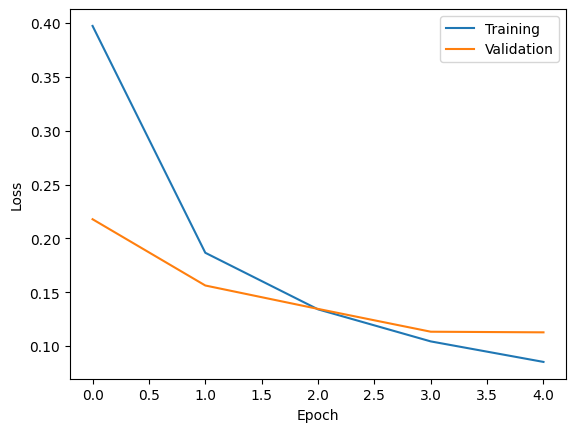

In [34]:
plot_loss(history.history)

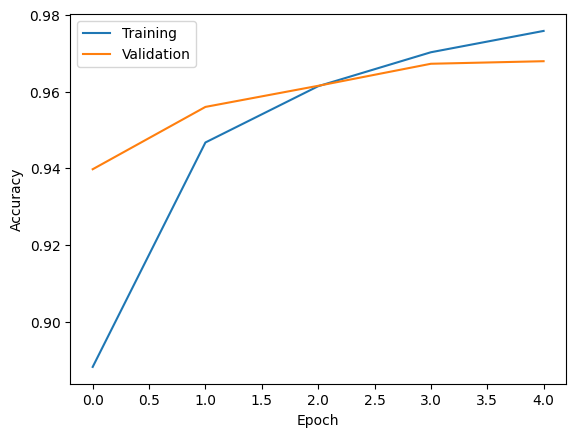

In [37]:
plot_acc(history.history)

In [80]:
# ANN 회귀 모델
class ANN(models.Model):
  def __init__(self, nin,nh,nout):
    hidden = layers.Dense(nh)
    output = layers.Dense(nout)
    relu = layers.Activation('relu')
    # connection
    x = layers.Input(shape=(nin,))
    h = relu(hidden(x))
    y = output(h)
    super().__init__(x,y)
    self.compile(loss = 'mse', optimizer='sgd', metrics=['mse'])

In [81]:
from keras import datasets
from sklearn import preprocessing

In [82]:
(x_train,y_train),(x_test,y_test) =  datasets.boston_housing.load_data()

In [83]:
# mimmax 스케일링 : 최소 최대가 0,1  -1,1로 변환
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test =  scaler.fit_transform(x_test)

In [84]:
# 하이퍼파라메터
nin = x_train.shape[1]
nh = 5
nout = 1

In [85]:
model = ANN(nin,nh,nout)
history = model.fit(x_train,y_train,epochs=100,batch_size=100, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 1s 55ms/step - loss: 456.2544 - mse: 456.2545 - val_loss: 121.1719 - val_mse: 121.1719
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 112.2075 - mse: 112.2075 - val_loss: 104.3109 - val_mse: 104.3109
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 77.5989 - mse: 77.5990 - val_loss: 96.5648 - val_mse: 96.5648
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 65.0446 - mse: 65.0446 - val_loss: 63.6466 - val_mse: 63.6466
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 55.2064 - mse: 55.2064 - val_loss: 66.1768 - val_mse: 66.1768
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 50.3137 - mse: 50.3137 - val_loss: 54.0439 - val_mse: 54.0439
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 47.6615 - mse: 47.6615 - val_loss: 55.0304 - val_mse: 55.0304
Epoch 8/100
4/4 [==============================] - 0s 

In [86]:
model.evaluate(x_test,y_test,batch_size=100)

2/2 [==============================] - 0s 7ms/step - loss: 36.7503 - mse: 36.7503


[36.75028610229492, 36.75028610229492]

In [88]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

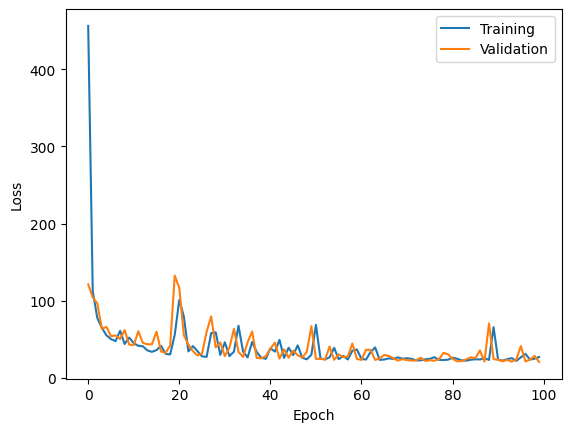

In [87]:
plot_loss(history.history)

In [89]:
# 검증용 mse 시각화 함수
def plot_mse(history, title=None):
  plt.plot(history['mse'], label = 'Training')
  plt.plot(history['val_mse'], label = 'Validation')
  if title:
    plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

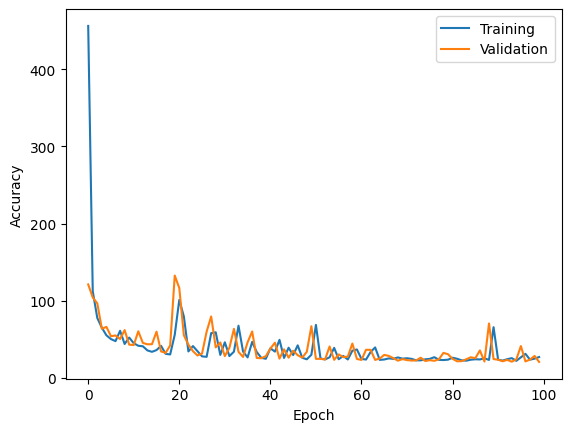

In [90]:
plot_mse(history.history)